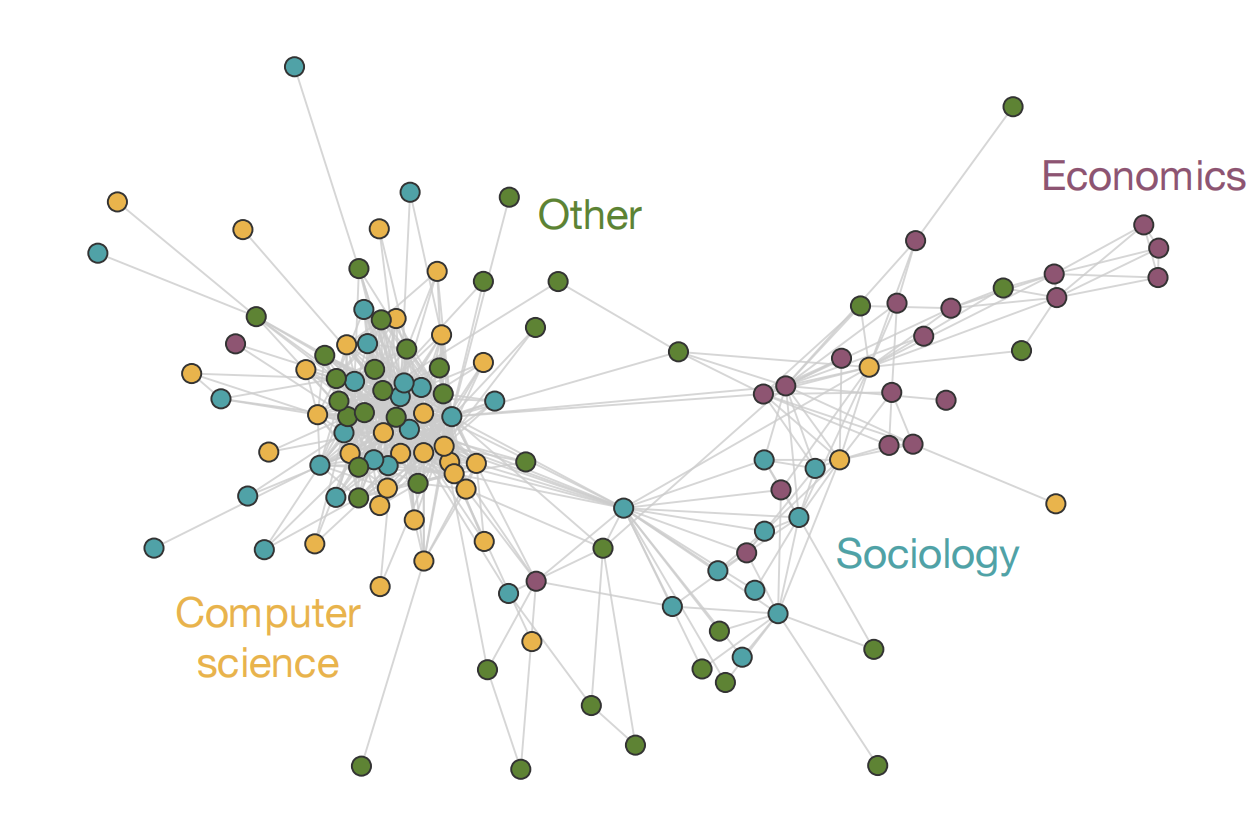

# 社会网络分析1

封面图片来自：[barabasi](https://barabasi.com)

**主要内容**
- 图的基础构建与分析
- 图的基本指标计算

导入基本库，并设置一些必要的参数 <p>
本章节网络分析的主要包：networkx

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# 设置 matplotlib 的字体以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体，可根据系统情况更换
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

## 【一】 图的基础构建与分析

###   一、 创建基础图

#### 1. 无向图

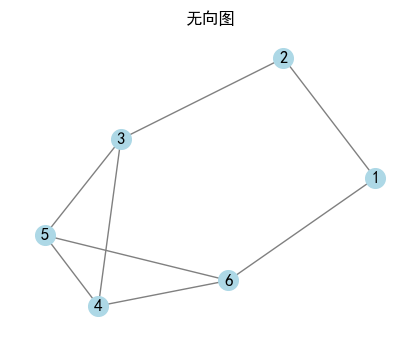

In [3]:
# -----------------------------------------
# 设置你想要添加的边
undirected_edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1), (3, 5), (4, 6)]
# -----------------------------------------

# 无向图的生成
G_undirected = nx.Graph()
G_undirected.add_edges_from(undirected_edges)
adj_matrix_undirected = nx.adjacency_matrix(G_undirected)
# print("无向图的邻接矩阵：")
# print(adj_matrix_undirected.todense())

# 可视化无向图
plt.figure(figsize=(4, 3))
pos = nx.spring_layout(G_undirected)
nx.draw(G_undirected, pos, with_labels=True, node_color='lightblue', node_size=200, edge_color='gray')
plt.title("无向图")
plt.show()

#### 2. 有向图

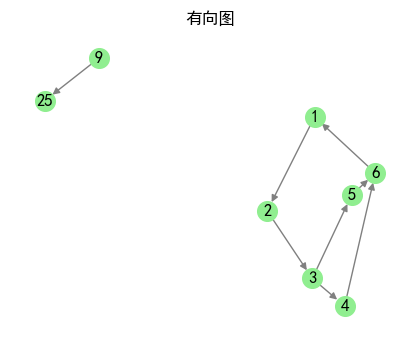

In [4]:
# -----------------------------------------
# 设置你想要添加的边
directed_edges = [(1, 2), (2, 3), (3, 4), (5, 6), (6, 1), (3, 5), (4, 6), (9, 25)]
# -----------------------------------------

G_directed = nx.DiGraph()
G_directed.add_edges_from(directed_edges)
adj_matrix_directed = nx.adjacency_matrix(G_directed)
# print("\n有向图的邻接矩阵：")
# print(adj_matrix_directed.todense())

# 可视化有向图
plt.figure(figsize=(4, 3))
pos = nx.spring_layout(G_directed)
nx.draw(G_directed, pos, with_labels=True, node_color='lightgreen', node_size=200,
        edge_color='gray', arrows=True)
plt.title("有向图")
plt.show()

#### 3. 加权无向图

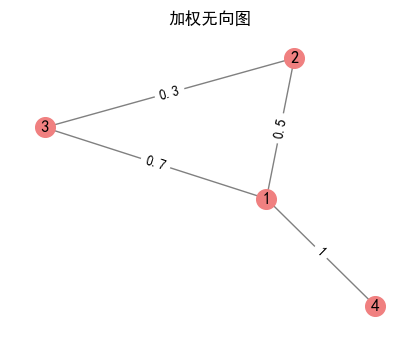

In [5]:
# 构建 6 维加权无向图
G_weighted = nx.Graph()

# -----------------------------------------
# 设置你想要的边与权重
G_weighted.add_edge(1, 2, weight=0.5)
G_weighted.add_edge(2, 3, weight=0.3)
G_weighted.add_edge(3, 1, weight=0.7)
G_weighted.add_edge(4, 1, weight=1)
# -----------------------------------------

adj_matrix_weighted = nx.adjacency_matrix(G_weighted, weight='weight')
# print("\n加权无向图的邻接矩阵：")
# print(adj_matrix_weighted.todense())

# 可视化加权无向图
plt.figure(figsize=(4, 3))
pos = nx.spring_layout(G_weighted)
nx.draw(G_weighted, pos, with_labels=True, node_color='lightcoral', node_size=200, edge_color='gray')
edge_labels = nx.get_edge_attributes(G_weighted, 'weight')
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=edge_labels)
plt.title("加权无向图")
plt.show()

### 二、实际案例数据

部分网络数据采用gml格式，可以采用如下方式读取：
```python
    import networkx as nx
    file = 'gml文件的位置'
    G = nx.read_gml(file)
```

**悲惨世界人物关联网络数据** <br>引用来源：https://public.websites.umich.edu/~mejn/netdata/

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\孟洁源\AppData\Local\Temp\ipykernel_20948\1583656600.py:3: SyntaxWarning: invalid escape sequence '\l'
  file = "E:\研究生学业\社会网络分析\社会网络分析可视化\lesmis.gml"


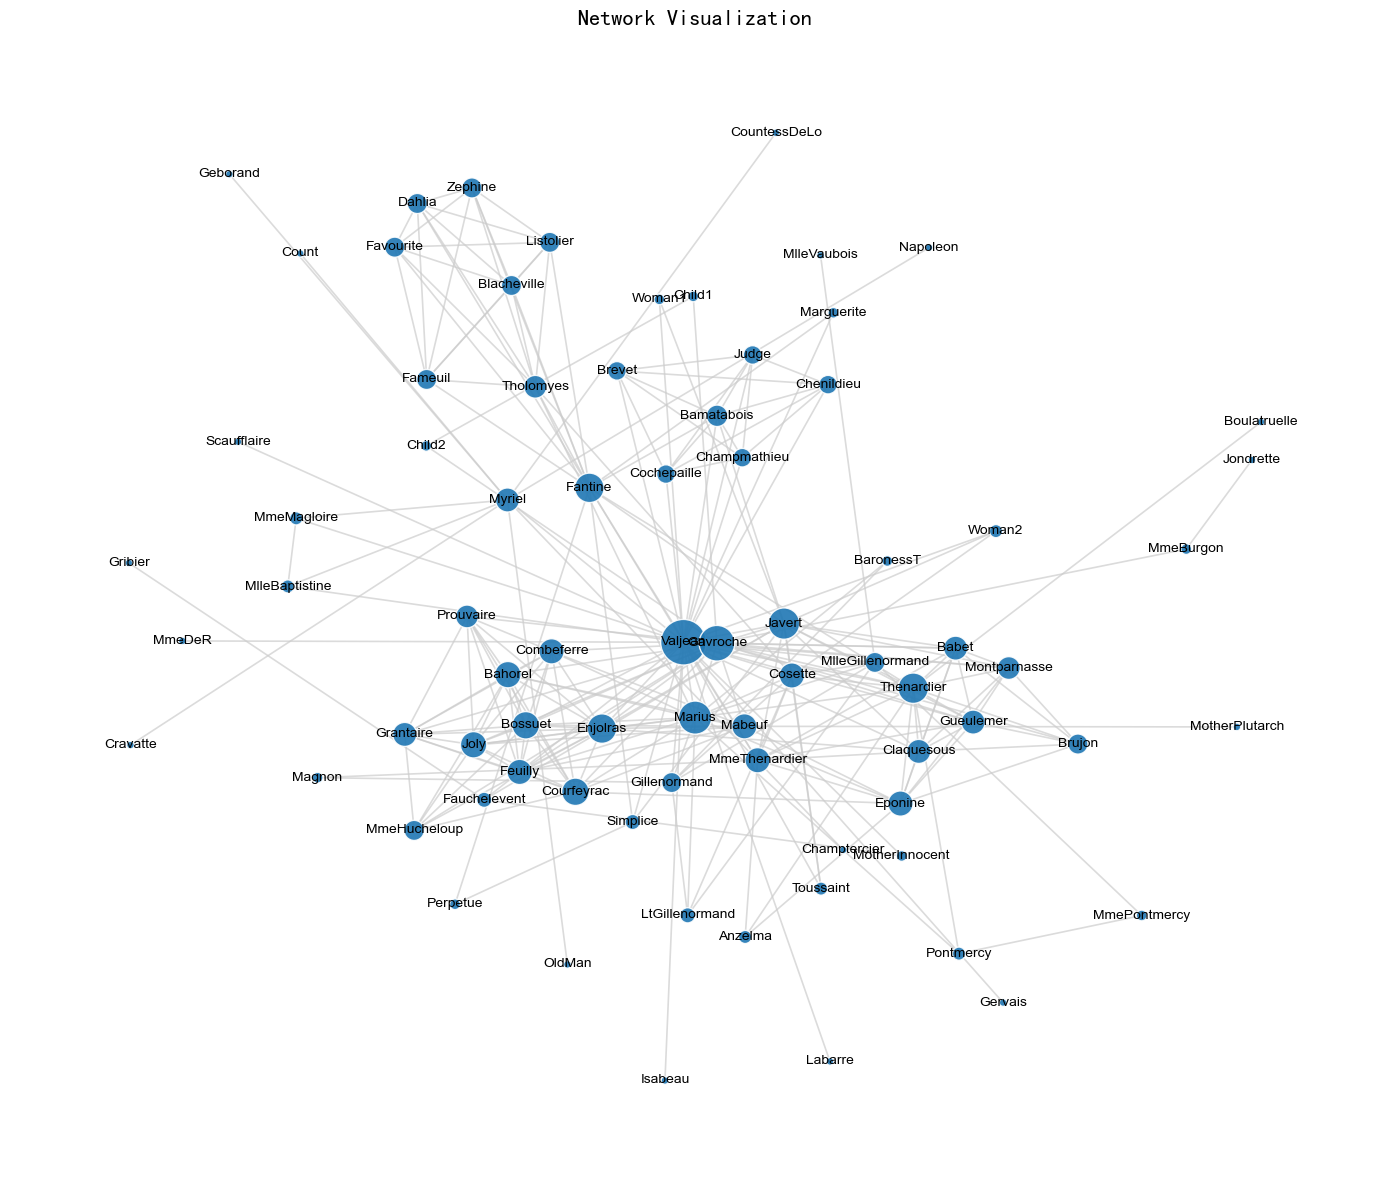

In [6]:
# ---------------------------------------------------------------------
# 修改file，可分析你想要分析的gml数据
file = "E:\研究生学业\社会网络分析\社会网络分析可视化\lesmis.gml"
G = nx.read_gml(file)
# ---------------------------------------------------------------------


# ---------------------------------------------------------------------
plt.figure(figsize=(14, 12))  # 增大画布尺寸

# 优化布局（调整k值控制节点间距，seed固定布局）
pos = nx.spring_layout(G, k=0.6, seed=42)

# 节点美化：根据度数设置节点大小，统一颜色
node_degree = dict(G.degree())
node_sizes = [v * 30 for v in node_degree.values()]  # 度数越大节点越大
nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color="#1f77b4",  # 深蓝色
    alpha=0.9,
    edgecolors="white"  # 节点边框白色
)

# 边美化：浅灰色细边
nx.draw_networkx_edges(
    G, pos,
    edge_color="#cccccc",
    width=1.2,
    alpha=0.7
)

# 标签美化：设置字体和大小
nx.draw_networkx_labels(
    G, pos,
    font_family="Arial",
    font_size=10,
    font_weight="normal",
)

# 图表整体美化
plt.title("Network Visualization", fontsize=16, fontweight="bold")
plt.axis("off")  # 关闭坐标轴
plt.tight_layout()  # 优化布局间距
plt.show()
# ---------------------------------------------------------------------

## 【二】图的基础指标计算

本节分析的数据为： **Social circles:Facebook** <br>
数据来源：https://snap.stanford.edu/data/ego-Facebook.html <br>
数据格式：txt

In [7]:
# -------------------------------------------
# 选择你要分析的文件

file = r'E:\研究生学业\社会网络分析\社会网络分析可视化\facebook_combined.txt'

# -------------------------------------------

# 读取解压后的文件
edges = []
with open(file, 'r') as f:
    for line in f:
        u, v = line.strip().split()
        edges.append((int(u), int(v)))

节点数量: 4039
边数量: 88234


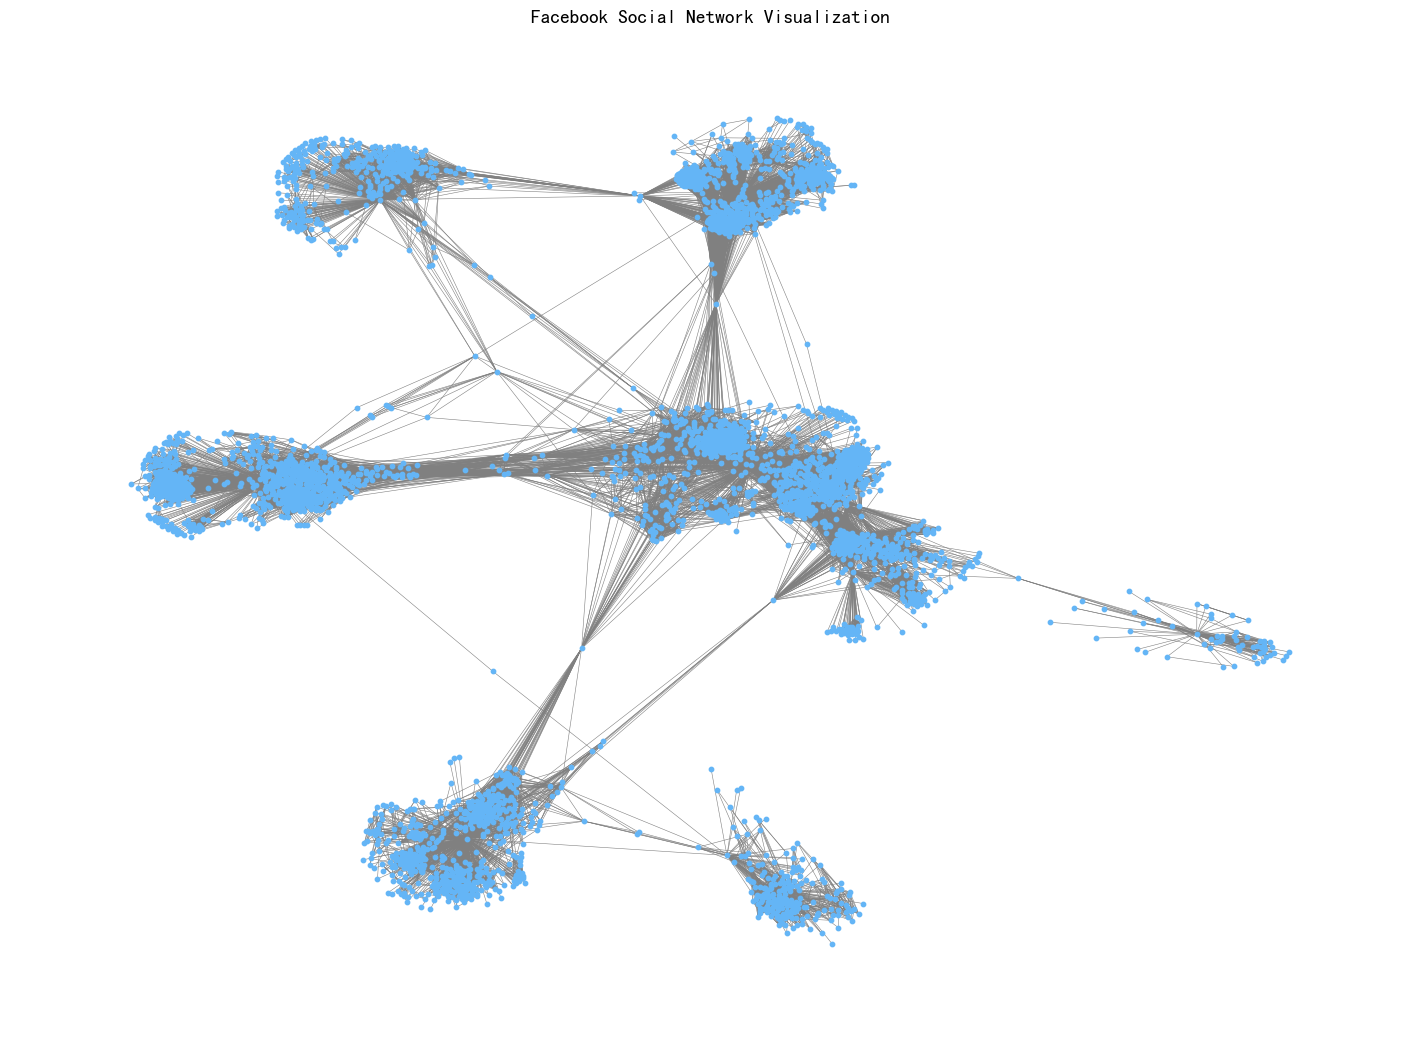

In [8]:
# 构建网络
G = nx.Graph()
G.add_edges_from(edges)

# 基础分析
print(f"节点数量: {G.number_of_nodes()}")
print(f"边数量: {G.number_of_edges()}")

# 可视化设置
plt.figure(figsize=(14, 10))  # 增大画布尺寸

# 调整布局参数，让节点分布更均匀
pos = nx.spring_layout(G, seed=42, k=0.15, iterations=200) 

# 绘制网络
nx.draw(
    G, pos,
    with_labels=False,
    node_size=10,          # 增大节点大小
    node_color='#64B5F6',  # 更鲜明的节点颜色（浅蓝色）
    edge_color='gray',
    width=0.4              # 调整边的粗细
)

# 优化标题样式
plt.title("Facebook Social Network Visualization", 
          fontsize=14, fontweight='bold')

plt.show()

---
**facebook社交网络的特点**
* 社交网络呈现显著社区化簇群结构，用户基于兴趣、关系等形成内部连接紧密的细分社交圈。  
* 部分枢纽节点跨簇群连接，作为信息跨社区传播的核心桥梁，主导网络连通性与扩散效率。  
* 存在边缘稀疏节点群，社交连接密度低，或为活跃度不足、社交圈较窄的独立小群体。  
* 网络通过强弱连接分层聚合，既保障细分社区聚合性，又维持全局关联，为社交推荐算法优化提供结构参考。

---
### 一、度、平均度、度分布  
1. **度（Degree）**  
   - **含义**：无向图中，节点的度指与其相连的边的数量；有向图中，分为入度（指向该节点的边数）和出度（该节点指向其他节点的边数）。  
   - **公式**：  
     - 无向图节点 $ v_i $ 的度：$ d(v_i) = \sum_{j=1}^n A_{ij} $，$ A $ 为邻接矩阵。  
     - 有向图节点 $ v_i $ 的入度：$ d_{in}(v_i) = \sum_{j=1}^n A_{ji} $，出度：$ d_{out}(v_i) = \sum_{j=1}^n A_{ij} $
 
2. **平均度（Average Degree）**  
   - **含义**：图中所有节点度的平均值，反映网络连接的整体密集程度。  
   - **公式**：$ \langle k \rangle = \frac{1}{N} \sum_{i=1}^N d(v_i) $，$ N $ 为节点总数。  

3. **度分布（Degree Distribution）**  
   - **含义**：描述网络中节点度的概率分布，即随机选一个节点，其度为 $ k $ 的概率 $ P(k) $。  

---

平均度：43.69


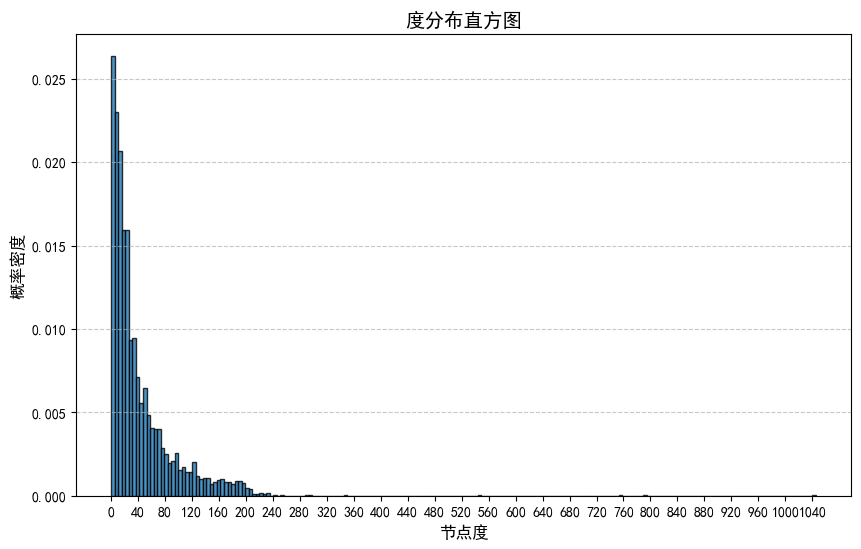

In [9]:
# 1. 计算节点的度
node_degrees = dict(G.degree())

# 2. 计算平均度
average_degree = np.mean(list(node_degrees.values()))
print(f"平均度：{average_degree:.2f}")

# 3. 绘制度分布直方图
degrees_list = list(node_degrees.values())

# 绘制细化后的度分布直方图
plt.figure(figsize=(10, 6))
# 增加bins数量（这里设为50），让柱子更多
plt.hist(degrees_list, bins=200, edgecolor='black', density=True, alpha=0.8) 

# 优化x轴刻度显示（每隔一定间隔显示刻度）
plt.xticks(np.arange(0, max(degrees_list)+1, 40))  # 每20个单位显示一个刻度

plt.title("度分布直方图", fontsize=14)
plt.xlabel("节点度", fontsize=12)
plt.ylabel("概率密度", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加背景网格
plt.show()

---
### 二、路径与距离、连通性  
1. **路径（Path）**  
   - **含义**：图中连接两个节点的边的序列，边不重复。  
2. **距离（Distance）**  
   - **含义**：两个节点间的最短路径包含的边数，记为 $ d(u, v) $。  
3. **连通性（Connectivity）**  
   - **含义**：无向图中，若任意两节点间存在路径，称图为连通图；有向图中，若任意两节点间存在双向路径，称强连通图。  
4. **图的直径**
   - **含义**：任意两节点直径的最大值
   - 要计算图的直径，要求图是连通的，否则直径无穷大
---

In [10]:
# 检查图的连通性
is_connected = nx.is_connected(G)
print(f"图的连通性: {is_connected}")

if is_connected:
    # 计算图的直径
    diameter = nx.diameter(G)
    print(f"图的直径: {diameter}")

    # 计算平均直径（平均最短路径长度）
    average_shortest_path_length = nx.average_shortest_path_length(G)
    print(f"图的平均直径（平均最短路径长度）: {average_shortest_path_length}")
else:
    print("图不连通，无法计算直径和平均直径。")

图的连通性: True
图的直径: 8
图的平均直径（平均最短路径长度）: 3.6925068496963913


---
### 三、集聚系数（Clustering Coefficient）  
1. **局部集聚系数（Local Clustering Coefficient）**  
   - **含义**：节点 $ v_i $ 的邻居节点间实际连接数与最大可能连接数的比值，衡量节点邻居的聚集程度。  
   - **公式**：$$ C_i = \frac{2E_i}{k_i(k_i - 1)} $$ $ E_i $ 是 $ v_i $ 邻居间的实际边数，$ k_i $ 是 $ v_i $ 的度。  

2. **平均集聚系数（Average Clustering Coefficient）**  
   - **含义**：所有节点局部集聚系数的平均值，反映网络整体的聚集特性。  
   - **公式**：$$ \langle C \rangle = \frac{1}{N} \sum_{i=1}^N C_i $$ 

3. **全局集聚系数（Global Clustering Coefficient）**  
   - **含义**：基于图中三角形数量，衡量网络中三角形结构的密集程度。  
   - **公式**：$$ C_{global} = \frac{3 \times \text{三角形数量}}{\text{所有节点的三元组数量}} $$  

---

In [11]:
# 1. 计算局部集聚系数
local_clustering = nx.clustering(G)
# print("局部集聚系数:")
# for node, coef in local_clustering.items():
#     print(f"节点 {node}: {coef}")

# 2. 计算平均集聚系数
average_clustering = nx.average_clustering(G)
print(f"\n平均集聚系数: {average_clustering}")


平均集聚系数: 0.6055467186200862


In [12]:
def calculate_global_clustering_coefficient(G):
    # 计算图中所有三角形的数量
    triangles = sum(nx.triangles(G).values()) // 3

    # 计算所有三元组的数量
    all_triads = 0
    for node in G.nodes():
        degree = G.degree(node)
        all_triads += degree * (degree - 1) // 2

    if all_triads == 0:
        return 0

    # 计算全局集聚系数
    global_clustering = 3 * triangles / all_triads
    return global_clustering

# 计算全局集聚系数
global_clustering = calculate_global_clustering_coefficient(G)
print(f"无向图的全局集聚系数: {global_clustering}")

无向图的全局集聚系数: 0.5191742775433075


---
### 四、中心性指标  
1. **度中心性（Degree Centrality）**  
   - **含义**：节点度的标准化值，衡量节点在网络中的直接影响力。  
   - **公式**：$$ DC(v_i) = \frac{d(v_i)}{N - 1} $$ $ N - 1 $ 为节点最大可能连接数。  

2. **中介中心性（Betweenness Centrality）**  
   - **含义**：节点出现在其他节点最短路径上的频率，反映节点对资源流通的控制能力。  
   - **公式**：$$ BC(v_i) = \sum_{s \neq v_i \neq t} \frac{\sigma_{st}(v_i)}{\sigma_{st}} $$ $ \sigma_{st} $ 是节点 $ s $ 到 $ t $ 的最短路径数，$ \sigma_{st}(v_i) $  是经过 $ v_i $ 的最短路径数。  

3. **接近度中心性（Closeness Centrality）**  
   - **含义**：节点到其他所有节点的距离倒数之和，衡量节点传播信息的效率。  
   - **公式**：$$ CC(v_i) = \frac{N - 1}{\sum_{j=1}^N d(v_i, v_j)} $$，$ d(v_i, v_j) $ 是 $ v_i $ 到 $ v_j $ 的最短距离。  

4. **特征向量中心性（Eigenvector Centrality）**  
   - **含义**：节点的重要性不仅取决于自身连接，还取决于邻居节点的重要性，通过邻接矩阵的特征向量计算。  
   - **公式**：$$ \mathbf{A}\mathbf{x} = \lambda\mathbf{x} $$ 求解邻接矩阵 $ \mathbf{A} $ 的最大特征值 $ \lambda $ 对应的特征向量 $ \mathbf{x} $，$ x_i $ 即节点 $ v_i $ 的特征向量中心性。

In [13]:
# 1. 度中心性
degree_centrality = nx.degree_centrality(G)

# 2. 中介中心性
betweenness_centrality = nx.betweenness_centrality(G)

# 3. 接近度中心性
closeness_centrality = nx.closeness_centrality(G)

# 4. 特征向量中心性
eigenvector_centrality = nx.eigenvector_centrality(G)

C:\Users\孟洁源\AppData\Local\Temp\ipykernel_20948\1834555813.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


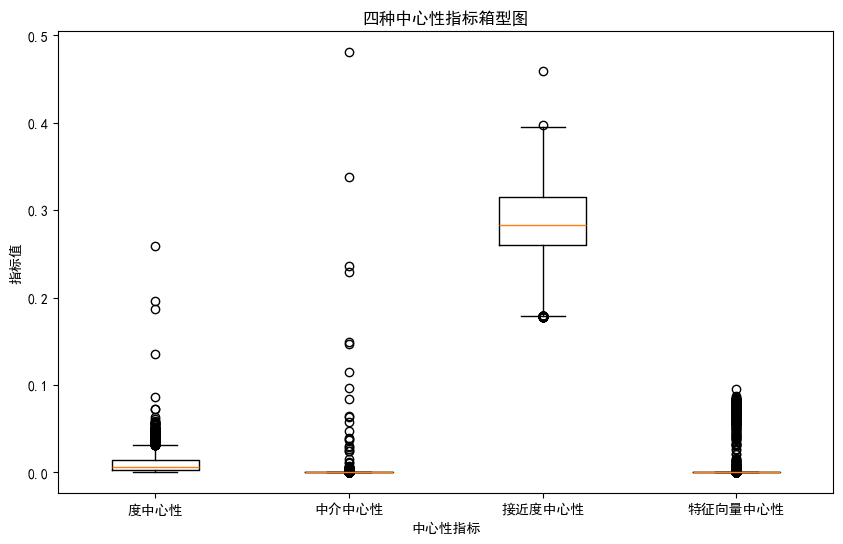

In [14]:
# 创建DataFrame
df = pd.DataFrame({
    '节点': list(G.nodes()),
    '度中心性': [degree_centrality[node] for node in G.nodes()],
    '中介中心性': [betweenness_centrality[node] for node in G.nodes()],
    '接近度中心性': [closeness_centrality[node] for node in G.nodes()],
    '特征向量中心性': [eigenvector_centrality[node] for node in G.nodes()]
})

# 提取各中心性指标数据
data = [df['度中心性'], df['中介中心性'], df['接近度中心性'], df['特征向量中心性']]
labels = ['度中心性', '中介中心性', '接近度中心性', '特征向量中心性']

# 绘制箱型图
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)
plt.title('四种中心性指标箱型图')
plt.xlabel('中心性指标')
plt.ylabel('指标值')
plt.show()

**Facebook 朋友列表网络呈现出一定的层级结构和差异性** <br>
* 大部分用户在各方面的中心性表现都较为普通，
* 少部分用户在不同的中心性指标上表现突出，这些用户可能是网络中的关键节点，对信息传播和社交互动起着重要作用。
* 一半用户的接近度中心性处于中等偏上水平，即这些用户能够相对较快地与网络中的其他用户建立联系，在信息传播效率方面表现尚可。